# Análise de Concessão de Crédito

## 1. Entendimento do negócio
 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/). O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 dias em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

- Objetivos da modelagem

Desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito. Este é um típico problema de classificação entre "bons" e "maus" pagadores com o intuito de conceder cartões de crédito, para o qual aplicaremos o método floresta aleatória (**random forest**) no modelo de aprendizagem de máquina.
  

## 2. Entendimento dos dados
A segunda etapa inclui o carregamento e entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

### 2.1 Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Segue abaixo uma cópia do dicionário de dados onde define-se cada uma das variáveis:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |flutuante|
| tempo de emprego | tempo de emprego em anos |flutuante|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





### 2.2 Carregando os pacotes


In [48]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from scipy import stats

sns.set()

### 2.3 Carregando os dados

In [49]:
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


### 2.4 Análise Exploratória 
Nesta etapa vamos iniciar a exploração dos dados e avaliar a distribuição das variáveis. Para tanto, vamos partir das variáveis categóricas para depois analisar as variáveis numéricas.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

Podemos notar da tabela acima que não há dados nulos na nossa base de dados.

In [51]:
print(df['mau'].value_counts())
print(f"\nTaxa de inadimplentes: {100*round(df['mau'].mean(),3)}%")


False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes: 2.3%


#### Visualização de dados categóricos
Vamos analisar as distribuições das variáveis categóricas mais significativas. Note que a variável "sexo" não será utilizada para não introduzirmos um possível viés de gênero.

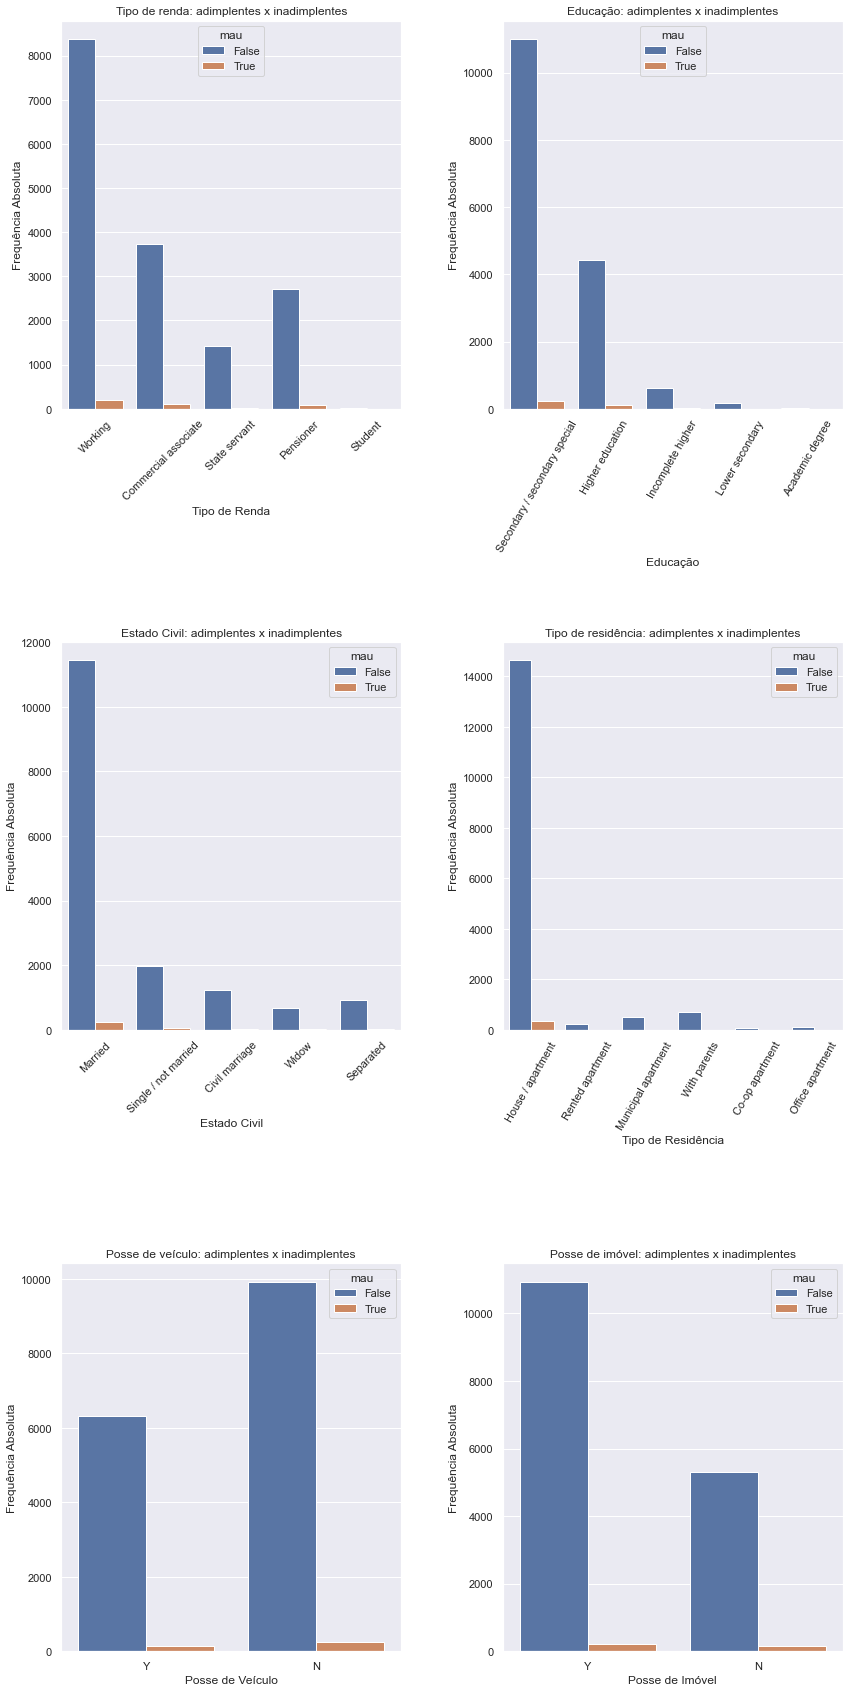

In [52]:
def plot_distribution(var: str, n_row: int, n_col: int, title: str, x_label: str, rotation: int, data: pd.DataFrame, hue: str) -> None:
    f = sns.countplot(ax = axes[n_row, n_col], x = var, data = data, hue = hue)
    f.set(title = title, xlabel = x_label, ylabel = 'Frequência Absoluta')
    f.tick_params(axis="x", rotation = rotation)
    return None

fig, axes = plt.subplots(3, 2, figsize=(14, 30))

plot_distribution('tipo_renda', 0, 0, 'Tipo de renda: adimplentes x inadimplentes', 
                  'Tipo de Renda', 45, df, 'mau')

plot_distribution('educacao', 0, 1, 'Educação: adimplentes x inadimplentes', 
                  'Educação', 60, df, 'mau')

plot_distribution('estado_civil', 1, 0, 'Estado Civil: adimplentes x inadimplentes', 
                  'Estado Civil', 45, df, 'mau')

plot_distribution('tipo_residencia', 1, 1, 'Tipo de residência: adimplentes x inadimplentes', 
                  'Tipo de Residência', 60, df, 'mau')

plot_distribution('posse_de_veiculo', 2, 0, 'Posse de veículo: adimplentes x inadimplentes', 
                  'Posse de Veículo', 0, df, 'mau')

plot_distribution('posse_de_imovel', 2, 1, 'Posse de imóvel: adimplentes x inadimplentes', 
                  'Posse de Imóvel', 0, df, 'mau')

plt.subplots_adjust(wspace=0.3, hspace=0.6)

#### Visualização de dados numéricos

Vamos começar analisando a variável "tempo_emprego".

<Figure size 432x288 with 0 Axes>

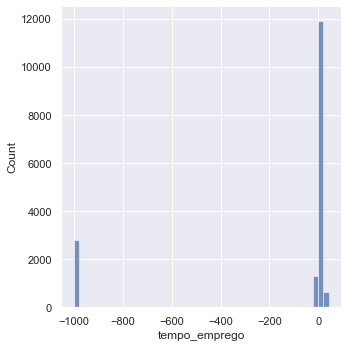

In [53]:
plt.clf()
var = "tempo_emprego"
sns.displot(df, x = var, bins = 50)
plt.show()

Como não existe tempo negativo, podemos concluir que os dados localizados em valores negativos correspondem à dados faltantes. Para melhor visualização da distribuição, vamos alterar o valor -1000 para -2.

<Figure size 432x288 with 0 Axes>

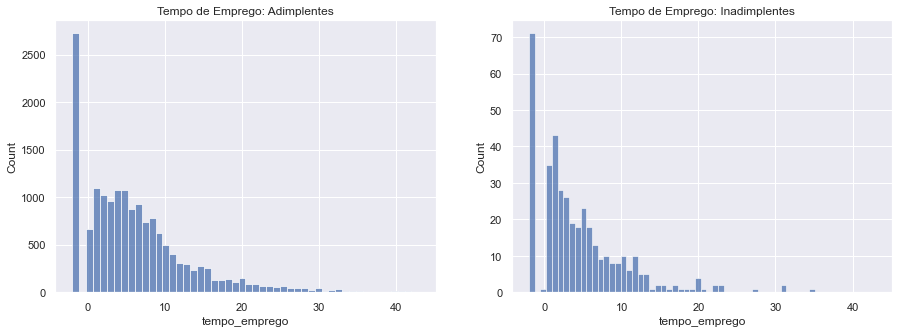

In [54]:
df.loc[df['tempo_emprego']<0,'tempo_emprego'] = -2
plt.clf()

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex = True)
f = sns.histplot(ax = axes[0], x = 'tempo_emprego', data = df[df['mau']==False], bins = 50)
f.set(title='Tempo de Emprego: Adimplentes')
f = sns.histplot(ax = axes[1], x = 'tempo_emprego', data = df[df['mau']==True], bins = 50)
f.set(title='Tempo de Emprego: Inadimplentes')

plt.show()

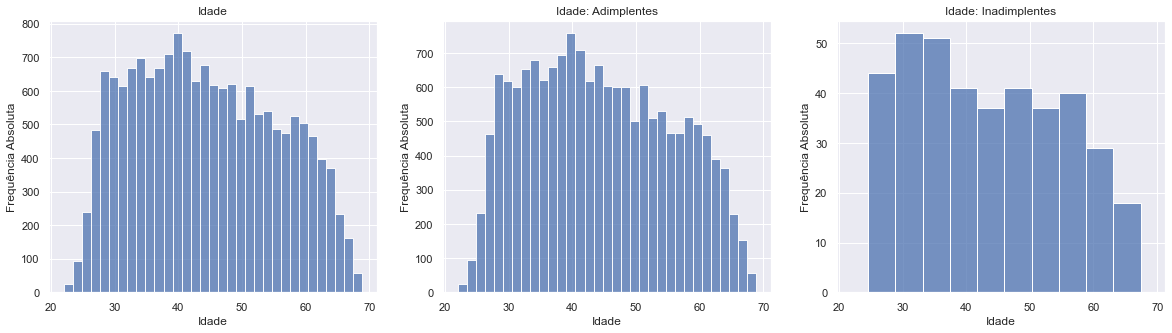

In [55]:
df_adimplente = df[df['mau'] == False]
df_inadimplente = df[df['mau'] == True]

coluna = 'idade'
titulos = ['Idade', 'Idade: Adimplentes', 'Idade: Inadimplentes']

eixo = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
   
  eixo+=1

plt.show()

Vemos que a distribuição da variável 'idade' apresenta diferenças significativas entre adimplentes e inadimplentes, assim como a variável 'tempo_emprego'. Para verificar essa afirmação, vamos aplicar o teste de Kolmogorov-Smirnov. 

In [56]:
print(stats.ks_2samp(df_adimplente['idade'], df_inadimplente['idade']))
print(stats.ks_2samp(df_adimplente['tempo_emprego'], df_inadimplente['tempo_emprego']))

KstestResult(statistic=0.07628914750685967, pvalue=0.022464595902090673)
KstestResult(statistic=0.15057715961774998, pvalue=5.246959876499015e-08)


Pelo teste acima concluímos que a variável 'tempo_emprego' realmente apresenta distribuições distintas entre bons e maus pagadores. A variável 'idade' também se mostra relevante na análise, embora não seja tão significativa quanto a primeira.

Vamos analisar agora as duas variáveis numéricas restantes: quantidade de filhos e quantidade de pessoas na residência.

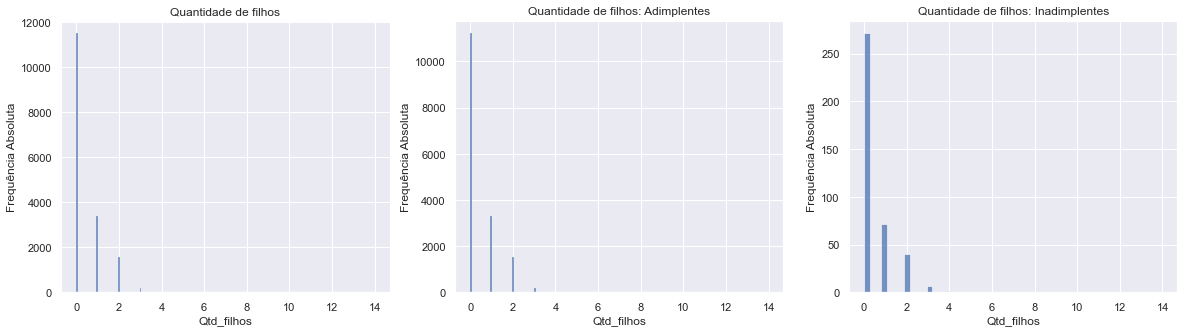

In [57]:
coluna = 'qtd_filhos'
titulos = ['Quantidade de filhos', 'Quantidade de filhos: Adimplentes', 'Quantidade de filhos: Inadimplentes']

eixo = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
   
  eixo+=1

plt.show()

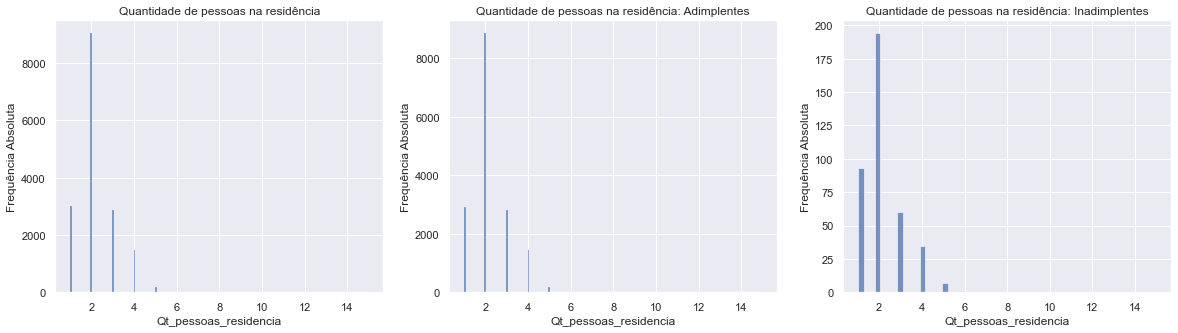

In [58]:
coluna = 'qt_pessoas_residencia'
titulos = ['Quantidade de pessoas na residência', 'Quantidade de pessoas na residência: Adimplentes', 'Quantidade de pessoas na residência: Inadimplentes']

eixo = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
   
  eixo+=1

plt.show()

Essas parecem ser variáveis com menor poder explanatório, quando comparadas à 'idade' e 'tempo_emprego'.

#### Análise bivariada

Vamos tentar entender a relação entre inadimplência, indicada pela variável resposta, e as variáveis explicativas (demais) mais significativas.


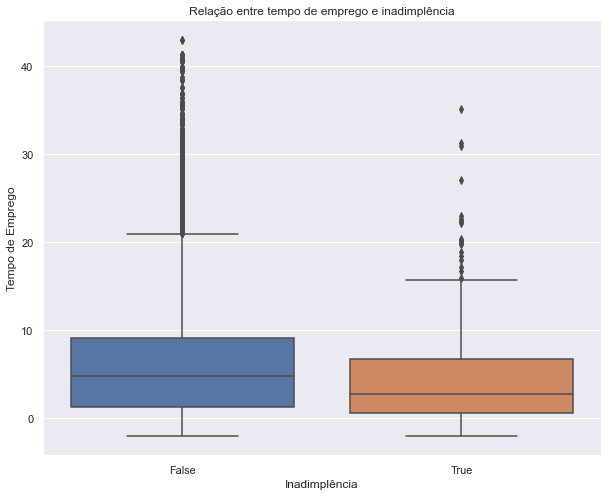

In [59]:
plt.figure(figsize=(10,8))
f = sns.boxplot(x='mau', y='tempo_emprego', data=df)
_ = f.set(
    title='Relação entre tempo de emprego e inadimplência', 
    xlabel='Inadimplência', 
    ylabel='Tempo de Emprego'
  )

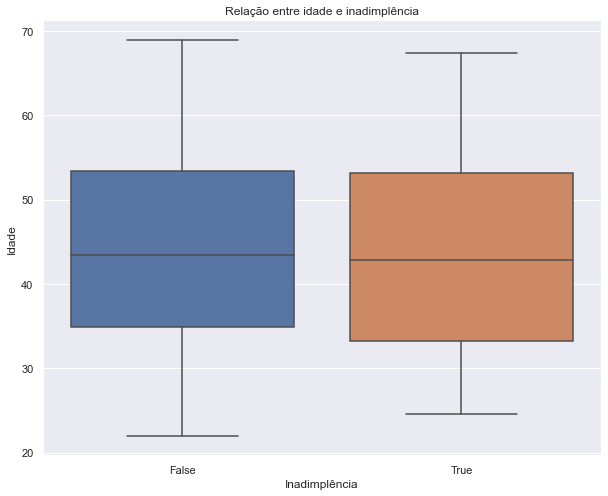

In [60]:
plt.figure(figsize=(10,8))
f = sns.boxplot(x='mau', y='idade', data=df)
_ = f.set(
    title='Relação entre idade e inadimplência', 
    xlabel='Inadimplência', 
    ylabel='Idade'
  )

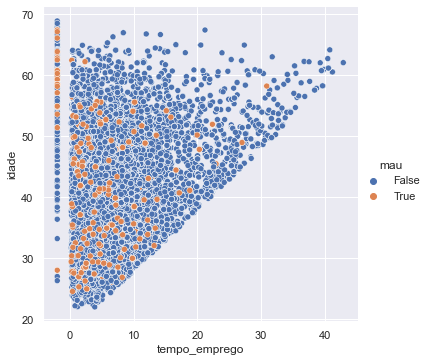

In [61]:
f = sns.relplot(x='tempo_emprego', y='idade', data=df, hue='mau')

Podemos observar uma tendência positiva de inadimplência para tempos de emprego menores que 5 anos, independente da idade (desconsiderando os pontos em 'tempo_emprego' = -2 que não possuem significado).

## 3. Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção

Neste caso, os dados já estão pré-selecionados
- limpeza

Precisaremos identificar e tratar dados faltantes
- construção

Neste projeto não faremos construção de novas variáveis
- integração

Temos apenas uma fonte de dados
- formatação

O pacote "scikitlearn" não aceita variáveis do tipo str, somente numéricas

Os dados já estão pré-selecionados, construídos e integrados. Porém, há dados faltantes a serem tratados (os valores negativos em 'tempo_emprego') e devemos corrigir a formatação de variáveis do tipo str que serão convertidas em dummies (flags).

In [62]:
# Verificando dados faltantes explícitos
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [63]:
# Criando uma tabela de metadados

metadata = df.dtypes.to_frame().reset_index()
metadata.columns = ['variavel','tipo']
categorias = []
for i in range(16):
    qtd = df.iloc[:,i].nunique()
    categorias.append(qtd)
#categorias 
metadata['qtd_categorias'] = categorias
metadata

,variavel,tipo,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


In [64]:
# criando variáveis dummy para as variáveis do tipo str apropriadas indicadas na tabela de metadados

data_encoded = pd.get_dummies(df, columns=['tipo_renda','educacao','estado_civil','tipo_residencia'], 
                              drop_first=True)
data_encoded['sexo'] = data_encoded['sexo'].map({'F': 1, 'M':0})
data_encoded['posse_de_veiculo'] = data_encoded['posse_de_veiculo'].map({'Y':1,'N':0})
data_encoded['posse_de_imovel'] = data_encoded['posse_de_imovel'].map({'Y':1,'N':0})
data_encoded.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,0,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [65]:
# Transformando os valores negativos em 'tempo_emprego' em NaN para então removê-los

data_encoded.loc[data_encoded['tempo_emprego'] == -2, 'tempo_emprego'] = np.nan
print(data_encoded.tempo_emprego.isna().sum())
data_encoded.dropna(inplace=True)
print(data_encoded.shape)

2793
(13857, 29)


In [66]:
# Salvando o dataframe corrigido em um novo arquivo

data_encoded.to_csv('demo01_corrigida.csv')

In [67]:
print(data_encoded['mau'].value_counts())
print(f"\nTaxa de inadimplentes: {100*round(data_encoded['mau'].mean(),3)}%")

False    13538
True       319
Name: mau, dtype: int64

Taxa de inadimplentes: 2.3%


## 4. Modelagem
Nessa etapa realizaremos a construção do modelo de classificação. Os passos típicos são:
- Selecionar a técnica de modelagem

Utilizaremos a técnica de floresta aleatória (**random forest**) e o **gradient boosting** para comparação, pois são técnicas bastante versáteis e robustas ao sobreajuste, que capturam bem padrões complexos nos dados, relativamente fáceis de se usar e que costumam produzir excelentes resultados para uma classificação como esta. 
- Desenho do teste

Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo. Além disso, usaremos a técnica de validação cruzada nos dados de treinamento para avaliar a performance do modelo no treino antes de avaliar sua performance de generalização nos dados de teste.
- Avaliação do modelo

Faremos a avaliação do nosso modelo através do cálculo de 3 métricas distintas: a acurácia, o F1 score e o Recall. Veremos que a acurácia não se mostra uma boa métrica dado que nosso dataset é desbalanceado. Já o F1 score e o Recall são métricas mais apropriadas para diferenciar a perfomance do modelo com relação a falsos positivos e falsos negativos.
#### Dividindo a base em treino e teste



In [68]:
# Tirando a variável resposta da base de treinamento. Note que também tiraremos a variável 'sexo', para não introduzirmos 
# viés de gênero. A variável 'possui_celular' também será retirada pois possui apenas uma categoria. Ou seja, não possui 
# poder preditivo.

x = data_encoded.drop(['mau', 'sexo', 'possui_celular'], axis = 1)
y = data_encoded['mau']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)

In [69]:
# Balanceamento do dataset utilizando técnica de oversampling da classe minoritária seguida por undersampling da 
# classe majoritária

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

smt = SMOTE(sampling_strategy=0.2, random_state=42)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
steps = [('o',smt),('u',under)]
pipeline = Pipeline(steps=steps)
x_train_bal, y_train_bal = pipeline.fit_resample(x_train,y_train)
print(y_train_bal.value_counts())
print(f"\nTaxa de inadimplentes balanceado: {100*round(y_train_bal.mean(),2)}%")

True     2032
False    2032
Name: mau, dtype: int64

Taxa de inadimplentes balanceado: 50.0%


### Rodando o modelo
Vamos utilizar aqui dois algoritmos para comparação: o **Gradient Boosting** e o **Random Forest**. A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. O mesmo acontece com o classificador GradientBoostingClassifier. Ele é bastante robusto ao sobreajuste no que se refere ao parâmetro ```n_estimator``` mas pode ser despendioso computacionalmente para um valor alto deste parâmetro.

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=423)
#clf.fit(x_train_bal,y_train_bal)

In [71]:
# usando cross validation para checar o f1_score no conjunto de treinamento
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(clf, x_train_bal, y_train_bal, scoring="f1", cv=cv, n_jobs=-1)
print('F1 score: %.3f' % mean(scores))

F1 score: 0.894


Como última etapa da construção do modelo, vamos avaliar agora como o nosso modelo generaliza para dados nunca vistos, isto é, nosso conjunto de teste. Vamos analisar 3 métricas separadamente para comparação: a acurácia, o F1 score e o Recall. Note que aqui devemos pegar uma amostra real da população e, portanto, desbalanceada.

In [30]:
clf.fit(x_train_bal,y_train_bal)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score: {0:.2f}%'.format(f1*100))
rec = metrics.recall_score(y_test, y_pred)
print('Recall: {0:.2f}%'.format(rec*100))

Acurácia: 95.61%
F1 score: 17.39%
Recall: 18.39%


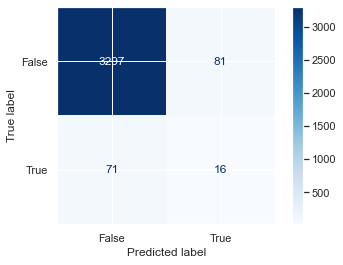

In [37]:
#fig, ax = plt.subplots(figsize=(7, 7))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap=plt.cm.Blues)

Para comparação, usaremos agora o classificador **Random Forest** para verificar se o desempenho do modelo pode melhorar.

In [72]:
# Treinando uma Random Forest com 100 árvores e pré-poda, estabelecendo um número mínimo de amostras para 
# quebra por árvore

clf = RandomForestClassifier(n_estimators=100, random_state=123, min_samples_split=5)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(clf, x_train_bal, y_train_bal, scoring="f1", cv=cv, n_jobs=-1)
print('F1 score: %.3f' % mean(scores))

F1 score: 0.941


In [39]:
# Calculando as métricas para o conjunto teste

clf.fit(x_train_bal,y_train_bal)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))
print('F1 score: {0:.2f}%'.format(f1*100))
rec = metrics.recall_score(y_test, y_pred)
print('Recall: {0:.2f}%'.format(rec*100))

Acurácia: 96.10%
F1 score: 27.81%
Recall: 29.89%


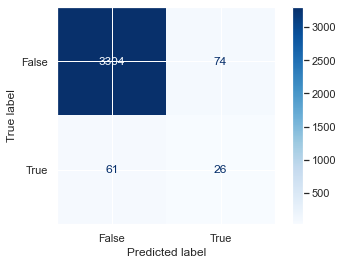

In [40]:
# Matriz de confusão

#fig, ax = plt.subplots(figsize=(7, 7))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap=plt.cm.Blues)

Podemos notar que a acurácia de ambos os classificadores é muito alta. Isto se deve ao fato de que o dataset utilizado não está balanceado e, portanto, o valor da acurácia é compatível com um modelo trivial que classifica todos os pagadores como "bons", dado que a taxa de inadimplentes é de 2.3%. Já o *F1 score* é uma métrica mais apropriada, por levar em consideração tanto a precisão quanto o *recall*, isto é, por discriminar tanto os falsos positivos quanto falsos negativos. Apesar de muito baixo em ambos os casos para o conjunto de teste, o que é esperado de um dataset desbalanceado, concluímos que algoritmo *Random Forest* tem um desempenho aproximadamente 10% melhor que o algoritmo *Gradient Boosting*.

In [73]:
# Comparação com um modelo baseline

dummy_clf = DummyClassifier(strategy="stratified", random_state=423)
dummy_clf.fit(x_train_bal, y_train_bal)
y_pred = dummy_clf.predict(x_test)
f1 = metrics.f1_score(y_test, y_pred)
print('F1 score: {0:.2f}%'.format(f1*100))

F1 score: 4.11%


Usando o classificador dummy como um modelo simples de comparação, vemos que o classificador Random Forest apresenta um ganho preditivo significativo da ordem de 23%.

## 5. Avaliação dos resultados

A etapa final do CRISP. Neste projeto, a nossa avaliação termina com a apresentação das métricas **acurácia**, ***F1 score*** e ***Recall***. Dado que a amostra da população é desbalanceada e que as métricas utilizadas não apresentam um desempenho satisfatório, uma análise em termos de valor esperado neste problema parece mais apropriado. Assim, como perspectiva futura, a ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora com a utilização do modelo de acordo com os custos e benefícios específicos relacionados ao problema de negócio analisado.

